# <div align="center"> Data Science for Social Scientists  </div>
### <div align="center"> ECO 4199 </div>
#### <div align="center">Class 4 - Linear Regressions</div>
### <div align="center"> 28 September 2021 </div>

<div align="center"> Fabien Forge, (he/him)</div>


Let's make sure you have all the required packages

In [24]:
# Let's make sure everything is running
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats


plt.style.use('seaborn-white')

# Today
- For almost all lectures we will follow closely the book [Introduction to Statistical Learning](http://faculty.marshall.usc.edu/gareth-james/)
- Coding will no longer be at the heart of what we are doing.
- But we will illustrate intuitions using code.
- Unlike before, the code will already be made available to you. You will only need to run it.
    - Some of this code is coming from this [set of scripts](https://github.com/JWarmenhoven/ISLR-python)

# Data Science
- Up until now, I showed you things in Python that you could have done in Stata
- Today, will be no different...
- Our goal for the remainder of this course will be to think about statistical learning
- To do so, we will start with the most basic tool you already know about: linear regressions

# What is Statistical Learning?
- Statistical learning is the art of learning from data
    - Finding patterns in the data
    - Calibrating this relationship
    - Predicting out of sample

# A motivating example

- Today we will use the Advertising dataset.
- This dataset is available from the R package ISLR or on the [book's webpage](https://www.statlearning.com/resources-first-edition)

The data set consists of the sales of that product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper.

In [25]:
# Let me set my current directory using the %cd magic
%cd "~/Dropbox/Data Science for Social Scientists/Classes/Class 4 - Linear Regressions/"

/Users/marlo/Dropbox/Data Science for Social Scientists/Classes/Class 4 - Linear Regressions


In [26]:
ads = pd.read_csv('Advertising.csv', usecols=[1,2,3,4])
display(ads.info())
ads.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# From ECO3151 to ECO 4199

- As you know, companies first pay for ads, then observe their sales
- Because of ECO3151, you may already be thinking:
    - How do I know if this is causal?
    - Should I control for newspaper and radio ads to know the effect of TV ads? 
- These are valid and super interesting questions but won't be the concern of this course
- Instead, we would like to predict sales on the basis of the three media budgets

# From Causation to Prediction
- In other words, in econometrics course we were truly concerned about the effect of a single variable (the treatment) on a given outcome (the dependent variable)
    - It doesn't mean that we were using only a single independent variable
    - But other variables were used, and thought of, as controls
- In our setting the advertising budgets are __input variables__ while sales is an __output variable__.
- What we want is to __predict__ sales using available data

# Language

In economics we use the term:
- __Regression__: to mean any regression of Y on X
    - In data science _regression_ means a continuous (or discrete but countably many) Y
    - Y is said to be a __quantitative response__ to X
    - This is opposed to a __classification__ task in which Y is binary (1,0)

In economics we use the term:
- Dependent variable: to mean Y
    - In data science this is usually called a __target__

# Prediction
- More generally, suppose that we observe a quantitative response Y 
- We also have p different predictors, X1,X2, . . .,Xp. 
- We assume that there is some relationship between Y and X = (X1,X2, . . .,Xp)
- This can be written in the very general form:
$$ Y = f(\mathbf{X}) + \varepsilon $$

# Making sense of the formula
$$ Y = f(\mathbf{X}) + \varepsilon $$
- Here f is some fixed but unknown __function__ of X1, . . . , Xp, in the __population__
- $\varepsilon$  is a random __error term__, which is independent of X and has mean zero. 
- In this formulation, $f$ represents the _systematic_ information that X provides about Y


# What is this function?

- You may be wondering what is this function about?
- Turns out you already kow at least one such function


\begin{equation*}
y= f(x) = \beta_0 + \beta_1 x
\end{equation*}

- $\beta_0$ and $\beta_1$ are two unknown __parameters__ that represent
the __intercept__ and __slope__ terms in the linear model.

# Simple linear regression
- The __simple linear regression__ is the simplest way to predict a __quantitative response__ of Y
- Here a single __predictor variable__ X influences Y. 
- It assumes that there is approximately a linear relationship between X and Y. 
- Before predicting Y, we first need to estimate these parameters.
- Let's estimate three distinct simple linear regressions, one for each independent variable

# Question to economists:
- Do you expect the relationship between advertisement and sales to be linear?


    - Marginal return anyone?

In [4]:
ads.head() 

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Text(0, 0.5, 'Sales')

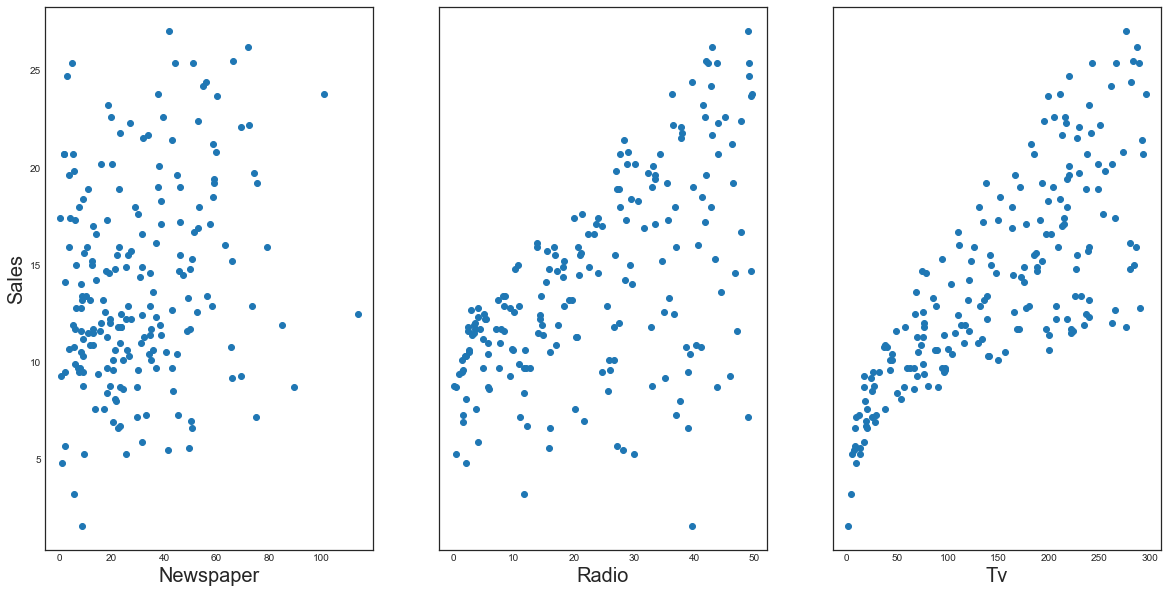

In [5]:
# Scatter plot
fig, axes = plt.subplots(1,3, figsize=(20,10), sharey=True)
for i, v in enumerate(np.sort(ads.columns[ads.columns!='Sales'].tolist())):
    axes[i].scatter(ads[v],ads['Sales'])
    axes[i].set_xlabel(v.capitalize(), fontsize=20)
    
axes[0].set_ylabel("Sales", fontsize=20)

# Down memory lane

What is the ordinary least square method minimizing?

Text(0, 0.5, 'Sales')

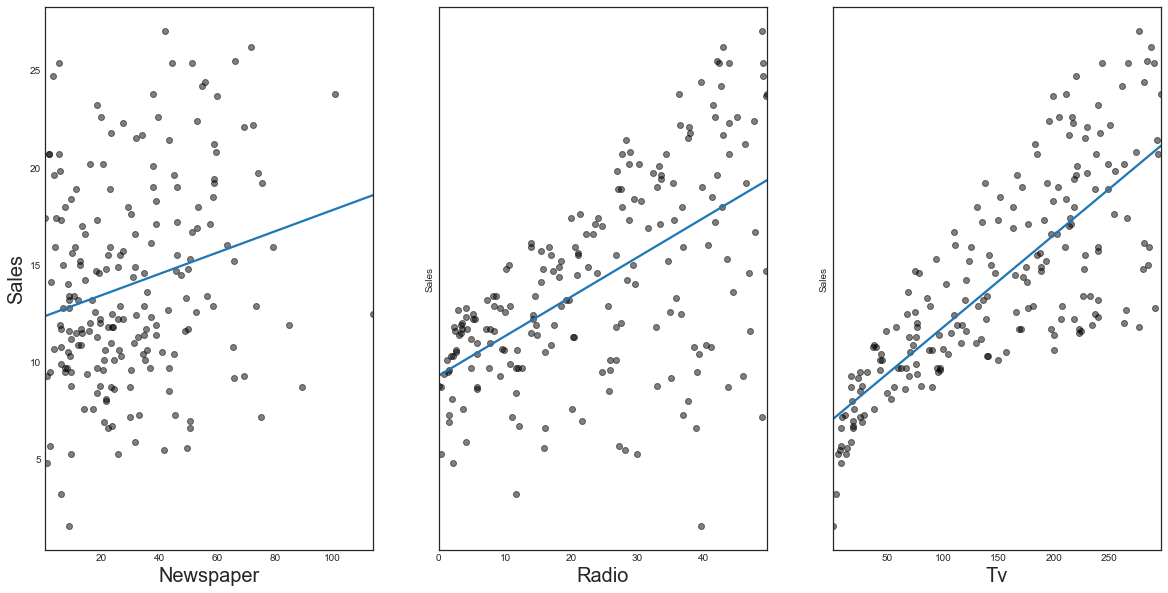

In [6]:
# Scatter plot
fig, axes = plt.subplots(1,3, figsize=(20,10), sharey=True)
for i, v in enumerate(np.sort(ads.columns[ads.columns!='Sales'].tolist())):
    sns.regplot(data=ads, x=v, y='Sales', order=1, ci=None, ax=axes[i],scatter_kws={"color": "black", "alpha":.5})
    axes[i].set_xlabel(v.capitalize(), fontsize=20)
    
axes[0].set_ylabel("Sales", fontsize=20)

![](OLS_min.png)


# OLS Regression

- As you probably remember the OLS regression find the $\beta_0$ and $\beta_1$ that minimize the residual sum of squares
- Let $\hat{y_i} = \hat{\beta}_0 + \hat{\beta}_1x_i$ be the prediction for Y based on the ith value of X.
- Then $e_i = y_i−\hat{y_i}$ represents the $i_{th}$ residual
    - This is the difference between the $i_{th}$ observed value (actual data) and the $i_{th}$ predicted value

- So the residual sum of squares (RSS) corresponds to 

$RSS = e^2_1 + e^2_2 + · · · + e^2_n$

or

$RSS = (y_1− \hat{\beta}_0− \hat{\beta}_1x_1)^2+(y_2− \hat{\beta}_0− \hat{\beta}_1x_2)^2+. . .+(y_n− \hat{\beta}_0− \hat{\beta}_1x_n)^2.$


# Minimized?

- Let's prove that the results from an ols regression indeed minize the RSS
- To do so we will use the [Statsmodels API](
https://www.statsmodels.org/stable/index.html)

In [32]:
# Regress Sales on a constant term and TV
results = smf.ols('Sales ~ TV ', data=ads).fit()
# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           1.47e-42
Time:                        15:17:16   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [33]:
ads['alpha_hat']=results.params['Intercept']
ads['beta_hat']=results.params['TV']
ads['Sales_hat']=ads['alpha_hat']+ ads['beta_hat']* ads['TV']
ads['Residual']=ads['Sales']- ads['Sales_hat']
ads['RSS']=np.square(ads['Sales']- ads['Sales_hat'])
ads.head() 

,TV,Radio,Newspaper,Sales,alpha_hat,beta_hat,Sales_hat,Residual,RSS
0,230.1,37.8,69.2,22.1,7.032594,0.047537,17.970775,4.129225,17.050503
1,44.5,39.3,45.1,10.4,7.032594,0.047537,9.147974,1.252026,1.567569
2,17.2,45.9,69.3,9.3,7.032594,0.047537,7.850224,1.449776,2.101851
3,151.5,41.3,58.5,18.5,7.032594,0.047537,14.234395,4.265605,18.195390
4,180.8,10.8,58.4,12.9,7.032594,0.047537,15.627218,-2.727218,7.437719


In [34]:
print(f"The RSS from this OLS regression is {ads['RSS'].sum().round(1)}")
print("The residual sums up to: {}! By construction!!".format(round(np.abs(ads['Residual'].sum()),1)))

The RSS from this OLS regression is 2102.5
The residual sums up to: 0.0! By construction!!


- What happends to the RSS if we keep the intercept, $\alpha$, constant and change $\beta$?
- In other words, can we find a $\beta$ that improves over the current $\hat{\beta}$

In [35]:
# prepare list for a new dataframe
betas=[beta for beta in np.arange(0.03, 0.065, 0.00025)] # all values of beta we will try
RSSs=[] # Create empty list to store RSS
# Change beta_hat by some small amounts

for beta in betas: # loop over all the
    ads['Sales_hat_2']=ads['alpha_hat']+ beta* ads['TV'] # predict sales given new beta
    ads['RSS_2']=np.square(ads['Sales']- ads['Sales_hat_2']) # square the residual
    RSSs.append(ads.RSS_2.sum()) # take the sum of the squared residuals and append to the RSSs list

data={'beta':betas, 'RSS': RSSs} # Put in a dictionary
df = pd.DataFrame(data=data) # Turn dictionary to dataframe
df.head()

,beta,RSS
0,0.03000,3883.494983
1,0.03025,3833.078547
2,0.03050,3783.386001
3,0.03075,3734.417345
4,0.03100,3686.172579


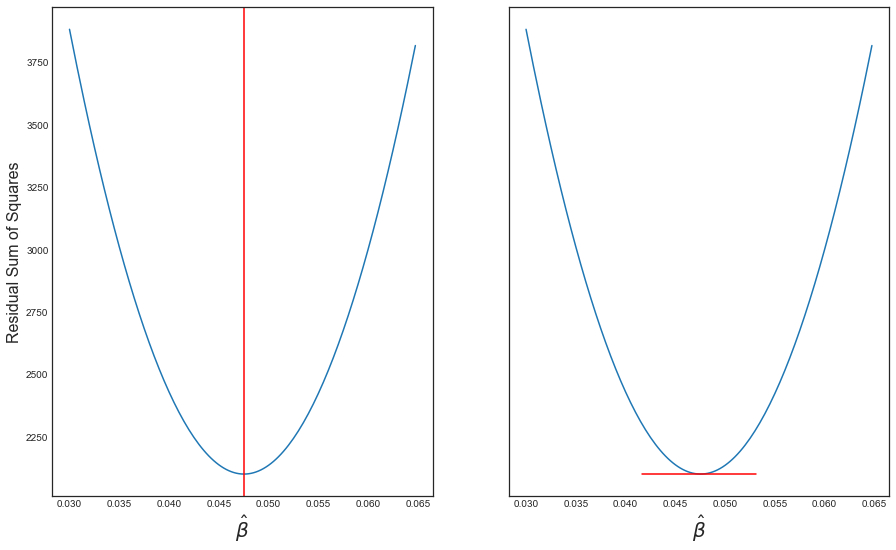

In [11]:
fig, axes=plt.subplots(1,2, sharey=True, figsize=(15,9))
sns.lineplot(data=df, x="beta", y="RSS", ax=axes[0])
axes[0].set_xlabel(r"$\hat{\beta}$", fontsize=20)
axes[0].set_ylabel("Residual Sum of Squares", fontsize=16)
axes[0].axvline(results.params['TV'],color='red')

sns.lineplot(data=df, x="beta", y="RSS", ax=axes[1])
axes[1].set_xlabel(r"$\hat{\beta}$", fontsize=20)
axes[1].axhline(y=ads['RSS'].sum(),color='red', xmin=0.35, xmax=0.65)
 

plt.show()

14.0225
[0.04753664]
21.025305831313513


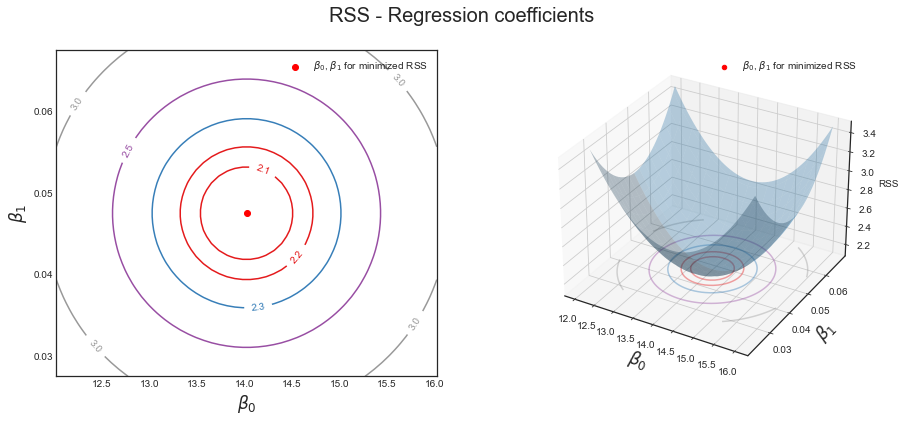

In [36]:
# Regression coefficients (Ordinary Least Squares)
regr = skl_lm.LinearRegression()

X = scale(ads.TV, with_mean=True, with_std=False).reshape(-1,1)
y = ads.Sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)/100
print(min_rss)

fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

# Deriving the OLS estimators, analytically (TL;DR)

- For the derivation, let's use the notation $Y_i$ for the dependent variable and $X_i$ for the regressor

- We want to solve $\underset{b_0, b_1}{min} \sum_{i=1}^n e_i^2$ for two parameters $b_0$ and $b_1$

- Here, $e_i = Y_i - (b_0 + b_1 X_i)$
- The values of $b_0$ and $b_1$ that minimize the sum of squared residuals will be the OLS estimators $\hat{\beta}_0$ and $\hat{\beta}_1$

- Begin by substituting for $e_i$, so the problem is:
\begin{equation*}
\underset{b_0, b_1}{min} \sum_{i=1}^n (Y_i - (b_0 + b_1 X_i))^2
\end{equation*}
- Then take partial derivatives with respect to each of the two parameters:
\begin{align*}
&\frac{\partial}{\partial b_0} \sum_{i=1}^n (Y_i - (b_0 + b_1 X_i))^2 = -2 \sum_{i=1}^n (Y_i - (b_0 + b_1 X_i)) \\
&\frac{\partial}{\partial b_1} \sum_{i=1}^n (Y_i - (b_0 + b_1 X_i))^2 = -2 \sum_{i=1}^n X_i (Y_i - (b_0 + b_1 X_i))
\end{align*}

## First-order conditions

-  We can set the partial derivatives equal to zero to get the first-order conditions that $\hat{\beta}_0$ and $\hat{\beta}_1$ must satisfy:
\begin{align*}
& -2 \sum_{i=1}^n (Y_i - (\hat{\beta}_0 + \hat{\beta}_1 X_i)) = 0 \\
& -2 \sum_{i=1}^n X_i (Y_i - (\hat{\beta}_0 + \hat{\beta}_1 X_i)) = 0
\end{align*}
- We can cancel the $-2$ and separate the terms to get:
\begin{align*}
& \sum_{i=1}^n Y_i - n \hat{\beta}_0 - \hat{\beta}_1 \sum_{i=1}^n X_i = 0 \\
& \sum_{i=1}^n X_i Y_i - \hat{\beta}_0 \sum_{i=1}^n X_i - \hat{\beta}_1 \sum_{i=1}^n X_i^2 = 0
\end{align*}

## Further simplification

- Dividing throughout by $n$ allows us to rewrite some terms as sample means:
\begin{align*}
& \bar{Y} - \hat{\beta}_0 - \hat{\beta}_1 \bar{X} = 0 \\
& \frac{1}{n} \sum_{i=1}^n X_i Y_i - \hat{\beta}_0 \bar{X} - \hat{\beta}_1 \frac{1}{n} \sum_{i=1}^n X_i^2 = 0
\end{align*}
- The first equation tells us that $\hat{\beta}_0$ is:
\begin{equation*}
\hat{\beta}_0 = \bar{Y} - \hat{\beta}_1 \bar{X}
\end{equation*}
- Substituting this into the second equation gives:
\begin{equation*}
\frac{1}{n} \sum_{i=1}^n X_i Y_i - \bar{X} \bar{Y} + \hat{\beta}_1 \bar{X}^2  - \hat{\beta}_1 \frac{1}{n} \sum_{i=1}^n X_i^2 = 0
\end{equation*}

In [37]:
# beta_0 = average of Y - beta hat * average of X
av_x=ads['TV'].mean() # average of X
av_y=ads['Sales'].mean() # average of Y

beta=av_y - results.params['TV']*av_x # alpha or beta_0
print("The intercept is: {}".format(round(beta,2)))

The intercept is: 7.03


# The OLS estimator of $\beta_1$


- We can then solve for $\hat{\beta}_1$, which can be written as:
\begin{equation*}
\hat{\beta}_1 = \frac{\frac{1}{n} \sum_{i=1}^n X_i Y_i - \bar{X} \bar{Y}}{\frac{1}{n} \sum_{i=1}^n X_i^2 - \bar{X}^2}
\end{equation*}
- Or equivalently:
\begin{equation*}
\hat{\beta}_1 = \frac{\sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^n (X_i - \bar{X})^2}
\end{equation*}
- Again equivalently (after dividing top and bottom by $n - 1$):
\begin{equation*}
\hat{\beta}_1 = \frac{s_{XY}}{s_X^2}
\end{equation*}
- So in the linear regression model with one regressor, the OLS estimator of $\beta_1$ is the sample covariance of $X$ and $Y$ divided by the sample variance of $X$


In [39]:
# beta_1 = covariance of X and Y over the variance of X:
cov_xy=ads[["Sales","TV"]].cov().iloc[0,1] # covariance of X and Y
var_x=ads.TV.var() # Variance of X
beta=cov_xy/var_x # beta_1, the slope, is the ratio of the 2
print("The covariance of X and Y is {0}.\nThe variance of X is {1}. \n\u03B2 is {2} as expected!".format(cov_xy.round(2),round(var_x,2),beta.round(4)))


The covariance of X and Y is 350.39.
The variance of X is 7370.95. 
β is 0.0475 as expected!


# Interpretation of $\hat{\beta}_0$ and $\hat{\beta}_1$

-  $\hat{\beta}_0$ is the intercept: it tells you where to position the line along the y-axis
- $\hat{\beta}_1$ is the slope: it tells you how steep is the line
- Remember how to interpret these in our example?

# Assessing the Accuracy of the Coefficient Estimates

- Recall that we assume that the __true__ relationship between X and Y takes the form:
$Y = f(\mathbf{X}) + \varepsilon$  
    - for some unknown function $f$, where $ \mathbb{E}[\varepsilon ]=0$
    - If $f$ is to be approximated by a linear function, then we can write this relationship as
    
$$Y = β_0 + β_1X + \varepsilon$$

- This is the __population regression line__

# From population to sample

- Of course you rarely observe the entire population
- Instead you get a __random sample__ to estimate your parameters
- Say that the parameters for the population ression line corresponds to:
$$ Y = \beta_0 + \beta_1 X + \varepsilon = 2 + 3 X + \varepsilon $$
    - How close, $\hat{\beta}_0$ and $\hat{\beta}_1$ will be to the true parameters?

In [48]:
# Set a seed so our numbers are the same
np.random.seed(1706)
# Create random array of 1,000 observations
obs=1000
# Create data set
data={'X_variable':np.random.randint(100, size=obs) , # X takes random integer values between 0 and 100
      'normal_error':np.random.normal(loc=0.0,scale=300.0, size=obs) # Normal erro with mean zero and SD 300 
     }
df=pd.DataFrame(data=data)
df['𝛽_0']=2 # true intercept value
df['𝛽_1']=3 # true slope value
df['Y_variable']= df['𝛽_0']+ df['𝛽_1']*df['X_variable'] + df['normal_error'] # y=f(x) for the entire population
df=df[['Y_variable','𝛽_0','𝛽_1', 'X_variable','normal_error']] # reorder columns

print(f"The error term expectation is: {df['normal_error'].mean()}")
df.head()

The error term expectation is: 8.828430558759148


,Y_variable,𝛽_0,𝛽_1,X_variable,normal_error
0,205.201291,2,3,90,-66.798709
1,-531.954032,2,3,37,-644.954032
2,165.862790,2,3,46,25.862790
3,139.189608,2,3,72,-78.810392
4,323.009562,2,3,56,153.009562


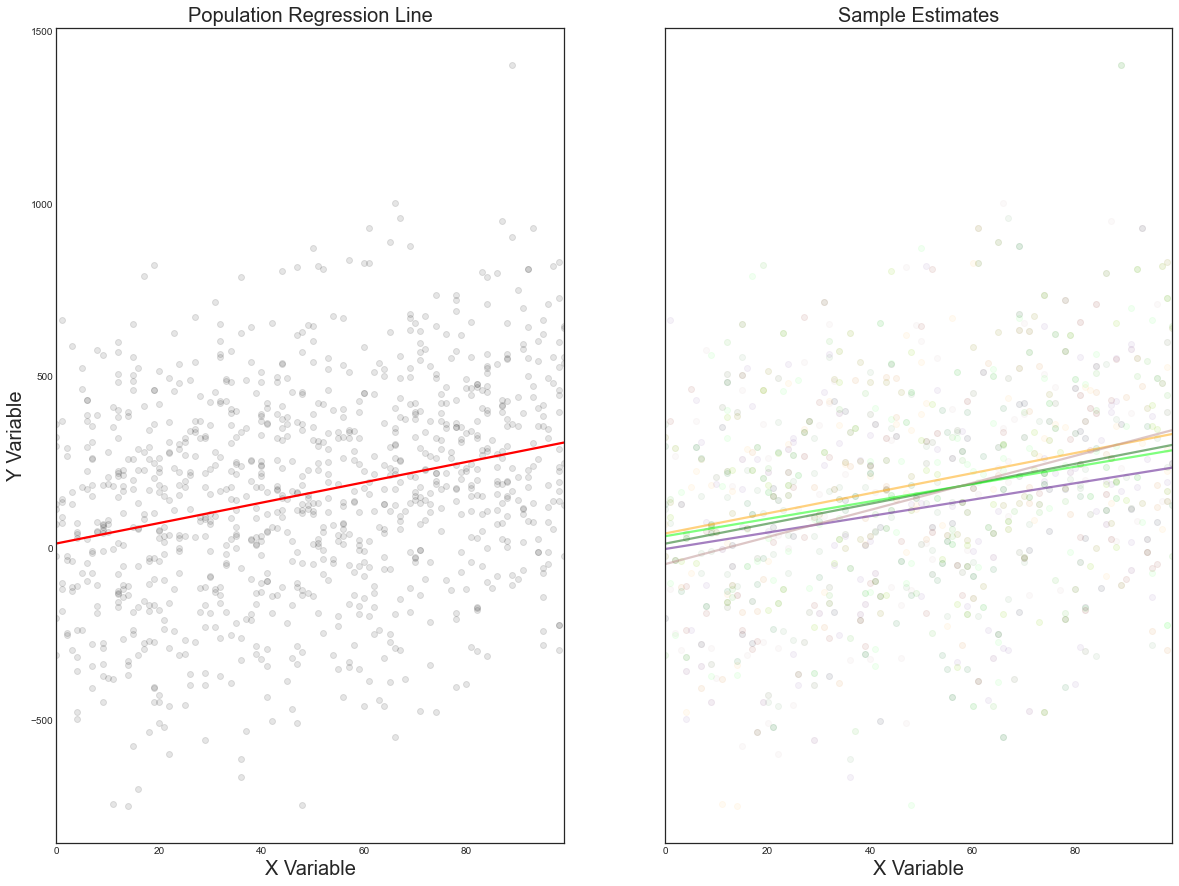

In [49]:
# Scatter plot
fig, axes = plt.subplots(1,2, figsize=(20,15), sharey=True)

# Fit the population line
sns.regplot(data=df, x='X_variable', y='Y_variable', order=1, ci=None, ax=axes[0],scatter_kws={"color": "black", "alpha":.1},line_kws={"color": "red"})
axes[0].set_ylabel("Y Variable", fontsize=20)
axes[0].set_xlabel("X Variable", fontsize=20)
axes[0].set_title("Population Regression Line", fontsize=20)


for i, v in enumerate(range(5)):
    colors=['darkgreen','orange','indigo','lime','rosybrown']
    sns.regplot(data=df.sample(n=300, random_state=(v+17)**2), x='X_variable', y='Y_variable',order=1, ci=None, ax=axes[1],scatter_kws={"color": colors[i], "alpha":.05},line_kws={"color": colors[i], 'alpha':.5})

axes[1].set_ylabel("", fontsize=20)
axes[1].set_xlabel("X Variable", fontsize=20)    
axes[1].set_title("Sample Estimates", fontsize=20)
plt.show()

# Error term and Uncertainty

- You can see from the population regression line that there is a lot of variation around the line of best fit
- With random sampling we can seen that the intercepts and slopes are close to the values of the population regression but not always the same
- This depends on the sampling distribution of $\beta$-OLS

# About unbiasnessness and consistency
- What does the distribution of $\hat{\beta}_1$ looks like?
- Let's take 500 samples of 150 observations, regress y on x each time and plot the distribution of $\hat{\beta}_1$

- Let's take 500 samples of 600 observations, regress y on x each time and plot the distribution of $\hat{\beta}_1$

- If $\hat{\beta}_1$ is __unbiased__ then the distribution should be centered around the true $\beta_1$
- If $\hat{\beta}_1$ is __consistent__ then the distribution narrow around the true $\beta_1$ as the number of observations increases 

In [50]:
num_samples=500 # Number of samples we will take
small_sample_obs=150 # Number of observations when taking small samples
large_sample_obs=600 # Number of observations when taking large samples
# Create numpy arrays of zeros with the num_samples dimension, we will then store estimates separately in them
small_sample=np.zeros(num_samples)
large_sample=np.zeros(num_samples)
# Run regressions for each sample
for i, v in enumerate(range(num_samples)):
    # small sample
    df_small=df.sample(n=small_sample_obs, random_state=v).copy() # small sample from the population
    results = smf.ols('Y_variable ~ X_variable ', data=df_small).fit() # Regress Sales on a constant term and TV
    small_sample[i]=results.params['X_variable'] # store the result in the numpy array at position i

    # large sample
    df_large=df.sample(n=large_sample_obs, random_state=v).copy() # large sample from population
    results = smf.ols('Y_variable ~ X_variable ', data=df_large).fit() # Regress Sales on a constant term and TV
    large_sample[i]=results.params['X_variable'] # store the result in the numpy array at position i
    
# save in a dataframe    
par=pd.DataFrame({'Small Sample':small_sample, 'Large Sample':large_sample})
par.head()    

,Small Sample,Large Sample
0,1.859138,2.915855
1,2.423601,2.812212
2,3.483789,2.769978
3,3.196424,2.962937
4,2.540165,3.021791


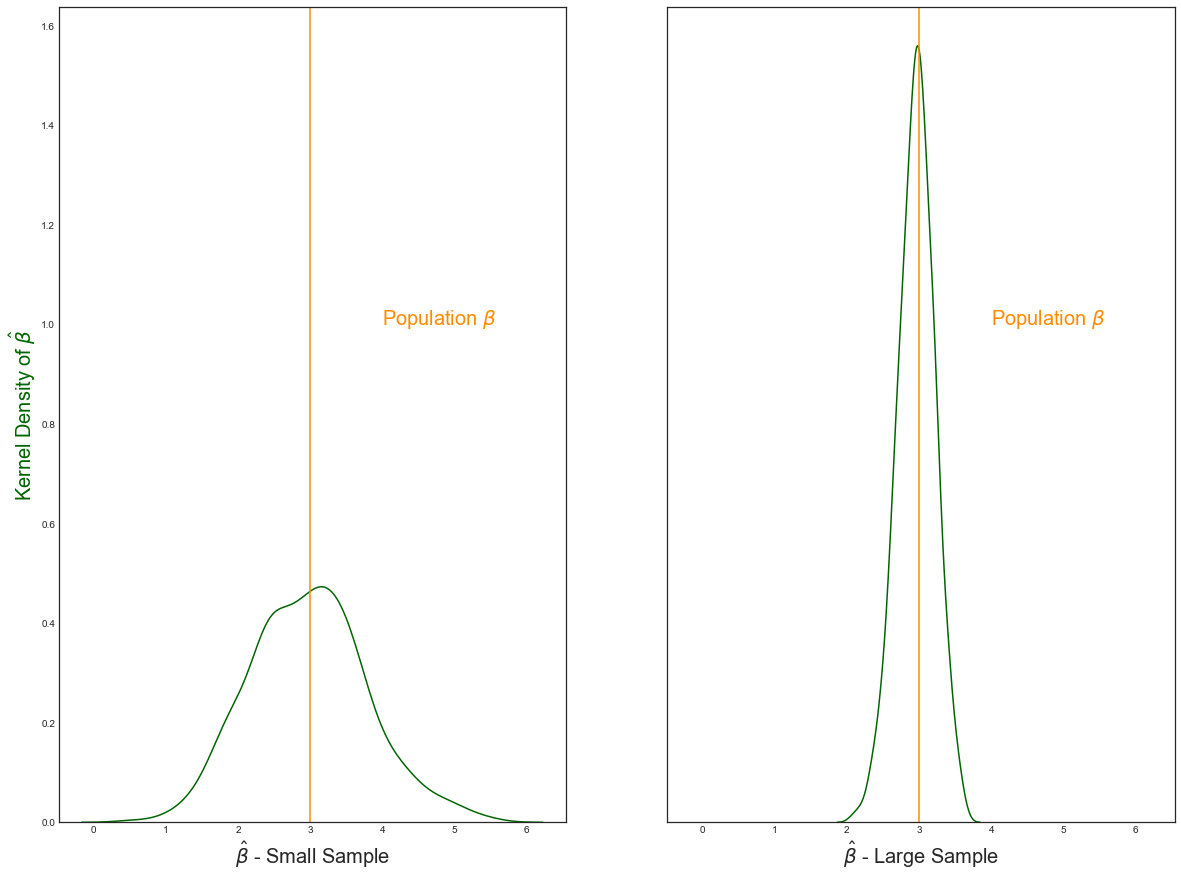

In [18]:
# Plot kernel density of the estimates around the true population parameter
fig, axes=plt.subplots(1,2, sharey=True, sharex=True, figsize=(20,15))

sns.kdeplot(data=par, x="Small Sample", ax=axes[0], color="darkgreen") #kdensity of small sample
sns.kdeplot(data=par, x="Large Sample", ax=axes[1], color="darkgreen") #kdensity of large sample

axes[0].axvline(3,color='darkorange') # Line for true Beta
axes[1].axvline(3,color='darkorange') # Line for true Beta
axes[0].text(4,1,r'Population $\beta$',fontsize=20, color='darkorange')
axes[1].text(4,1,r'Population $\beta$',fontsize=20, color='darkorange')

# Label axes
axes[0].set_ylabel(r"Kernel Density of $\hat{\beta}$", fontsize=20, color="darkgreen")
axes[0].set_xlabel(r"$\hat{\beta}$ - Small Sample", fontsize=20)
axes[1].set_xlabel(r"$\hat{\beta}$ - Large Sample", fontsize=20)
plt.show()

# OLS estimator continued
- So the OLS estimator is an unbiassed and consistent estimator
- It follows from these properties that one can test for parameters significance
- Using in particular the fact that $\hat{\beta}_1$ is normally distributed
- This is the __hypothesis testing__ process:
    - H0: There is no effect and we picked $\hat{\beta}_1$ from a normal distribution centered at zero
    - H1: It is unlikely we picked a value $\hat{\beta}_1$ from a normal distribution centered at zero

# Standard Errors

- You may remember from econometrics that you are not only interested in the magnitude of the parameter estimate

- You also care about the distribution of $\hat{\beta}_1$, $\sigma_{\hat{\beta}_1}^2$

- You can't observe $\sigma_{\hat{\beta}_1}^2$ (a population parameter) but you can estimate __Standard Errors__

- You may remember that, SEs are given by the formula:

\begin{equation*}
\hat{\sigma}_{\hat{\beta}_1}^2 = \frac{1}{n} \times \frac{\frac{1}{n - 2} \sum_{i = 1}^{n} (X_i - \bar{X})^2 \hat{u}_i^2}{\left[\frac{1}{n} \sum_{i = 1}^n (X_i - \bar{X})^2\right]^2}
\end{equation*}


\begin{equation*}
SE(\hat{\beta}_1) = \sqrt{\hat{\sigma}_{\hat{\beta}_1}^2}
\end{equation*}

Let's look at our last estimation from our last exercise

In [19]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Y_variable   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     33.24
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           1.31e-08
Time:                        11:23:37   Log-Likelihood:                -4265.5
No. Observations:                 600   AIC:                             8535.
Df Residuals:                     598   BIC:                             8544.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.8501     23.955      1.079      0.2

Let's create a normal distribution, centered at zero and with standard deviation from this estimate

0.4252311188951777


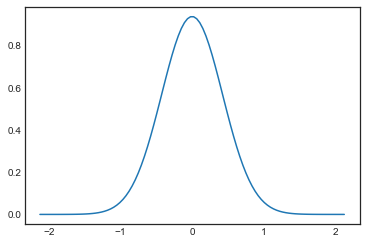

In [51]:
mu = 0 # center at zer0
sigma = results.bse['X_variable'] # Standard Deviation from SEs
print(sigma)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100) # range is 5 standard deviations away from 0, to the left and to the right
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

How far is our $\hat{\beta}_1$ from zero?

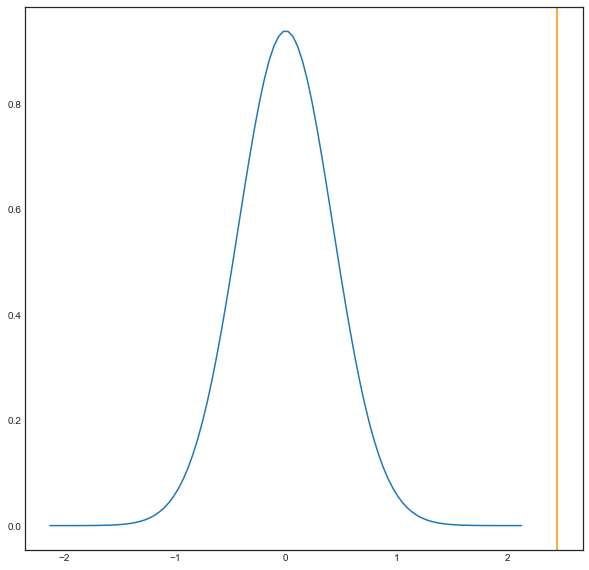

In [21]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

ax.plot(x, stats.norm.pdf(x, mu, sigma)) # Plot the normal distribution centered at zero and sigma=SE
ax.axvline(round(results.params['X_variable'],2),color='darkorange') # Line for true Beta

plt.show()

# t-statistic

- How likely are we to observe a value for $\hat{\beta}_1=2.4517$ if the true value is zero and the standard deviation is equal to the standard errors?
    - Very unlikely
- This is also what you get from the t-statistic
$$t = \frac{\hat{\beta}_1 - \beta_{1,0}}{SE(\hat{\beta}_1)} = 5.766 $$

- The result from this estimation suggests we are 5.8 standard deviations away from zero... this is far!
- We can conclude that $\hat{\beta}_1 \neq 0$

# Inference vs Causal Effect
- You may notice that haven't checked any of the requirement for causality 
    - e.g. that the error term is not correlated with the treatment (OVB, reverse causality etc.)
- Instead we only checked whether we should trust our parameter is significantly different from zero
- This is because our main interest is prediction:
    - We don't really care about causation
    - We care about our ability to predict quantitative movements of Y
    - This is conceptually very different

# Assessing the Accuracy of the Model
- Hypothesis testing tells us whether we should trust the parameters are significant
- This is different from __model accuracy__
    - Model accuracy tells us the extent to which the entire model fits the data
    - This is linked to parameter accuracy via the __residual standard error__ (RSE) and the $R^2$
    - Of course because we are looking at the simple linear regression model this is a small difference

# Residual Standard Error
- Recall from the population model that each observation is associated with an error term $\varepsilon$. 
- Due to the presence of these error terms, even if we knew the true regression line (i.e. even if $β_0$ and $β_1$ were known), we would not be able to perfectly predict Y from X.
- The RSE is an estimate of the standard deviation of $\varepsilon$
- Roughly speaking, it is the average amount that the response will deviate from the true regression line.

# RSE - formula
\begin{equation*}
RSE = \sqrt{ \frac{1}{n-2} RSS } = \sqrt{ \frac{1}{n-2} \sum_{i=1}^n (y_i - \hat{y}_i)^2 }
\end{equation*}
- The RSE is considered a measure of the lack of fit of the model
- If predictions are very close to the true outcome values
    - that is, if $\hat{y}_i$ ≈ $y_i$ for i = 1, . . . , n
    - then RSE will be small, and we can conclude that the model fits the data very well.
- RSE is expressed in units of Y which makes hard to know what's a good RSE

# $R^2$ Statistic

- $R^2$ statistic provides an alternative measure of fit. 
- It takes the form of a proportion
    - the proportion of variance explained
    - and so it always takes on a value between 0 and 1 
    - and is independent of the scale of Y.
- The formula is given by:
\begin{equation*}
R^2 = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS}
\end{equation*}

with TSS = $\sum (y_i − \bar{y})^2$, the __total sum of squares__

# $R^2$ Statistic continued

- TSS measures the total variance in the response Y , 
    - it can be  thought of as the amount of variability inherent in the response before the regression is performed 

- In contrast, RSS measures the amount of variability that is left unexplained after performing the regression. 
    - TSS−RSS measures the amount of variability in the response that is explained by performing the regression
    
- __R2 measures the proportion of variability in Y that can be explained using X__. 
    - close to 1 indicates that a large proportion of the variability in the response has been explained by the regression. 
    - close to 0 indicates that the regression did not explain much of the variability in the response
        - this might occur because the linear model is wrong, or the inherent error is high, or both.

# Multiple Linear Regression
- Of course there is no reason to limit the number of inputs to a single variable
- When adding variables we allow for each predictor to have a separate slope coefficient in a single model.

$$Y = β_0 + β_1X_1 + β_2X_2 + · · · + β_pX_p + \varepsilon$$

In [52]:
display(ads.head())

results = smf.ols('Sales ~ TV + Radio + Newspaper ', data=ads).fit()
print(results.summary())

,TV,Radio,Newspaper,Sales,alpha_hat,beta_hat,Sales_hat,Residual,RSS,Sales_hat_2,RSS_2
0,230.1,37.8,69.2,22.1,7.032594,0.047537,17.970775,4.129225,17.050503,21.931569,0.028369
1,44.5,39.3,45.1,10.4,7.032594,0.047537,9.147974,1.252026,1.567569,9.913969,0.236227
2,17.2,45.9,69.3,9.3,7.032594,0.047537,7.850224,1.449776,2.101851,8.146294,1.331039
3,151.5,41.3,58.5,18.5,7.032594,0.047537,14.234395,4.265605,18.195390,16.842219,2.748239
4,180.8,10.8,58.4,12.9,7.032594,0.047537,15.627218,-2.727218,7.437719,18.739394,34.098517


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           1.58e-96
Time:                        16:35:07   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

[0.18799423 0.04575482]
2.9210999124051398


,Radio,TV
count,200.000000,200.000000
mean,23.264000,147.042500
std,14.846809,85.854236
min,0.000000,0.700000
25%,9.975000,74.375000
50%,22.900000,149.750000
75%,36.525000,218.825000
max,49.600000,296.400000


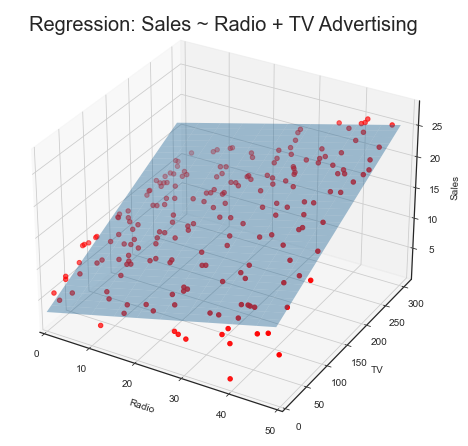

In [23]:
# Get estimates
regr = skl_lm.LinearRegression()
X = ads[['Radio', 'TV']]
y = ads.Sales
regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

# What are the min/max values of Radio & TV?
# Use these values to set up the grid for plotting.
display(ads[['Radio', 'TV']].describe())

# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])

# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(ads.Radio, ads.TV, ads.Sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales')
plt.show()

# Is There a Relationship Between the Response and Predictors?

- In the multiple regression setting with __p-predictors__, we need to ask whether __all of the regression coefficients are zero__
    - i.e. whether $β_1 = β_2 = · · · = β_p = 0$. 
    
Formula $$ F = \frac{(TSS − RSS)/p}{RSS/(n − p − 1)} $$

- F-statistic: 570.3, reject the null: at least one parameter is significant (we already knew that)
    - Rule of thumbs: f-stat should be greater than 1
    - Much greater than 1 if n is large